In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os

%matplotlib inline

# Build Time Evaluation

In [2]:
build_time_paths = glob.glob("data/20230310/**/*build_times*", recursive=True)
build_time_dataframes = []

for path in build_time_paths:
    benchmark_name = (path.split("/")[-1]).split("-")[0]    
    csv = pd.read_csv(path)
    csv.insert(0, column="BENCHMARK_NAME", value=benchmark_name)    
    build_time_dataframes.append(csv)

build_times = pd.concat(build_time_dataframes)
build_times = build_times.query('COLUMN_DATA_TYPE != "string"')

## Summed Build Time per Benchmark

In [3]:
def sum_grouping(df):
    return df.drop(columns=["COLUMN_ID"]).groupby(["BENCHMARK_NAME", "COLUMN_DATA_TYPE", "HISTOGRAM_NAME"]).sum()

summed_bts = sum_grouping(build_times)
display(summed_bts)

TOTAL_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                              
job            int              EqualDistinctCountHistogram  2.777333e+08   
                                EquiHeightHistogram          2.570862e+08   
                                EquiWidthHistogram           2.570862e+08   
                                GDYHistogram                 2.777332e+08   
                                MaxDiffAreaHistogram         2.570862e+08   
                                MaxDiffFrequencyHistogram    2.570862e+08   
tpcc           float            EqualDistinctCountHistogram  4.601780e+06   
                                EquiHeightHistogram          4.601780e+06   
                                EquiWidthHistogram           4.601780e+06   
                                GDYHistogram                 4.601780e+06   
                                MaxDiffAreaHistogram         4.601780e+06   
                                MaxDiffFrequencyHistogram    4.601780e+06   
               int              EqualDistinctCountHistogram  3.549202e+07   
                                EquiHeightHistogram          3.549202e+07   
                                EquiWidthHistogram           3.549202e+07   
                                GDYHistogram                 3.549202e+07   
                                MaxDiffAreaHistogram         3.549202e+07   
                                MaxDiffFrequencyHistogram    3.549202e+07   
tpcds          float            EqualDistinctCountHistogram  6.867736e+08   
                                EquiHeightHistogram          6.863553e+08   
                                EquiWidthHistogram           6.863553e+08   
                                GDYHistogram                 6.867739e+08   
                                MaxDiffAreaHistogram         6.863553e+08   
                                MaxDiffFrequencyHistogram    6.863553e+08   
               int              EqualDistinctCountHistogram  1.323682e+09   
                                EquiHeightHistogram          1.323609e+09   
                                EquiWidthHistogram           1.323609e+09   
                                GDYHistogram                 1.323682e+09   
                                MaxDiffAreaHistogram         1.323609e+09   
                                MaxDiffFrequencyHistogram    1.323609e+09   
tpch           float            EqualDistinctCountHistogram  2.665442e+08   
                                EquiHeightHistogram          2.665363e+08   
                                EquiWidthHistogram           2.665363e+08   
                                GDYHistogram                 2.665443e+08   
                                MaxDiffAreaHistogram         2.665363e+08   
                                MaxDiffFrequencyHistogram    2.665363e+08   
               int              EqualDistinctCountHistogram  3.161443e+08   
                                EquiHeightHistogram          3.161392e+08   
                                EquiWidthHistogram           3.161392e+08   
                                GDYHistogram                 3.161443e+08   
                                MaxDiffAreaHistogram         3.161392e+08   
                                MaxDiffFrequencyHistogram    3.161392e+08   

                                                             BIN_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                           
job            int              EqualDistinctCountHistogram       3648   
                                EquiHeightHistogram               3648   
                                EquiWidthHistogram                3648   
                                GDYHistogram                      3648   
                                MaxDiffAreaHistogram              3648   
                                MaxDiffFrequencyHistogram         3648   
tpcc           float            EqualDistinctCountHistogram        266   
       

### Average Build Times per Benchmark

In [4]:
def avg_grouping(df):
    return df.drop(columns=["COLUMN_ID"]).groupby(["BENCHMARK_NAME", "COLUMN_DATA_TYPE", "HISTOGRAM_NAME"]).mean()

display(avg_grouping(build_times))

TOTAL_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                              
job            int              EqualDistinctCountHistogram  5.049697e+06   
                                EquiHeightHistogram          4.674295e+06   
                                EquiWidthHistogram           4.674295e+06   
                                GDYHistogram                 5.049695e+06   
                                MaxDiffAreaHistogram         4.674295e+06   
                                MaxDiffFrequencyHistogram    4.674295e+06   
tpcc           float            EqualDistinctCountHistogram  4.183436e+05   
                                EquiHeightHistogram          4.183436e+05   
                                EquiWidthHistogram           4.183436e+05   
                                GDYHistogram                 4.183436e+05   
                                MaxDiffAreaHistogram         4.183436e+05   
                                MaxDiffFrequencyHistogram    4.183436e+05   
               int              EqualDistinctCountHistogram  8.253958e+05   
                                EquiHeightHistogram          8.253958e+05   
                                EquiWidthHistogram           8.253958e+05   
                                GDYHistogram                 8.253958e+05   
                                MaxDiffAreaHistogram         8.253958e+05   
                                MaxDiffFrequencyHistogram    8.253958e+05   
tpcds          float            EqualDistinctCountHistogram  8.584670e+06   
                                EquiHeightHistogram          8.579442e+06   
                                EquiWidthHistogram           8.579442e+06   
                                GDYHistogram                 8.584674e+06   
                                MaxDiffAreaHistogram         8.579442e+06   
                                MaxDiffFrequencyHistogram    8.579442e+06   
               int              EqualDistinctCountHistogram  7.040864e+06   
                                EquiHeightHistogram          7.040472e+06   
                                EquiWidthHistogram           7.040472e+06   
                                GDYHistogram                 7.040863e+06   
                                MaxDiffAreaHistogram         7.040472e+06   
                                MaxDiffFrequencyHistogram    7.040472e+06   
tpch           float            EqualDistinctCountHistogram  2.961602e+07   
                                EquiHeightHistogram          2.961514e+07   
                                EquiWidthHistogram           2.961514e+07   
                                GDYHistogram                 2.961603e+07   
                                MaxDiffAreaHistogram         2.961514e+07   
                                MaxDiffFrequencyHistogram    2.961514e+07   
               int              EqualDistinctCountHistogram  1.663917e+07   
                                EquiHeightHistogram          1.663890e+07   
                                EquiWidthHistogram           1.663890e+07   
                                GDYHistogram                 1.663917e+07   
                                MaxDiffAreaHistogram         1.663890e+07   
                                MaxDiffFrequencyHistogram    1.663890e+07   

                                                             BIN_COUNT  \
BENCHMARK_NAME COLUMN_DATA_TYPE HISTOGRAM_NAME                           
job            int              EqualDistinctCountHistogram  66.327273   
                                EquiHeightHistogram          66.327273   
                                EquiWidthHistogram           66.327273   
                                GDYHistogram                 66.327273   
                                MaxDiffAreaHistogram         66.327273   
                                MaxDiffFrequencyHistogram    66.327273   
tpcc           float            EqualDistinctCountHistogram  24.181818   
       

## Total Build Times

In [5]:
summed_bts_df = summed_bts.reset_index()
def visualize_benchmark(benchmark_name):
    bts = summed_bts_df[summed_bts_df["BENCHMARK_NAME"] == benchmark_name]
    bts_float = bts.query('COLUMN_DATA_TYPE == "float"')
    bts_int = bts.query('COLUMN_DATA_TYPE == "int"')

    if (bts_float.size > 0):
        sns.set_context('paper')
        sns.set(rc={'figure.figsize':(15,5)})
        ax = sns.barplot(x = 'HISTOGRAM_NAME', y = 'BUILD_TIME', data = bts_float,
                    palette = 'Blues', edgecolor = 'w')
        ax.set(xlabel='Histogram Name (floats)', ylabel='Build Time in s')
        plt.show()
    
    if (bts_int.size > 0):
        sns.set_context('paper')
        sns.set(rc={'figure.figsize':(15,5)})
        ax = sns.barplot(x = 'HISTOGRAM_NAME', y = 'BUILD_TIME', data = bts_int,
                    palette = 'Blues', edgecolor = 'w')
        ax.set(xlabel='Histogram Name (ints)', ylabel='Build Time in s')
        plt.show()

### JOB Build Times

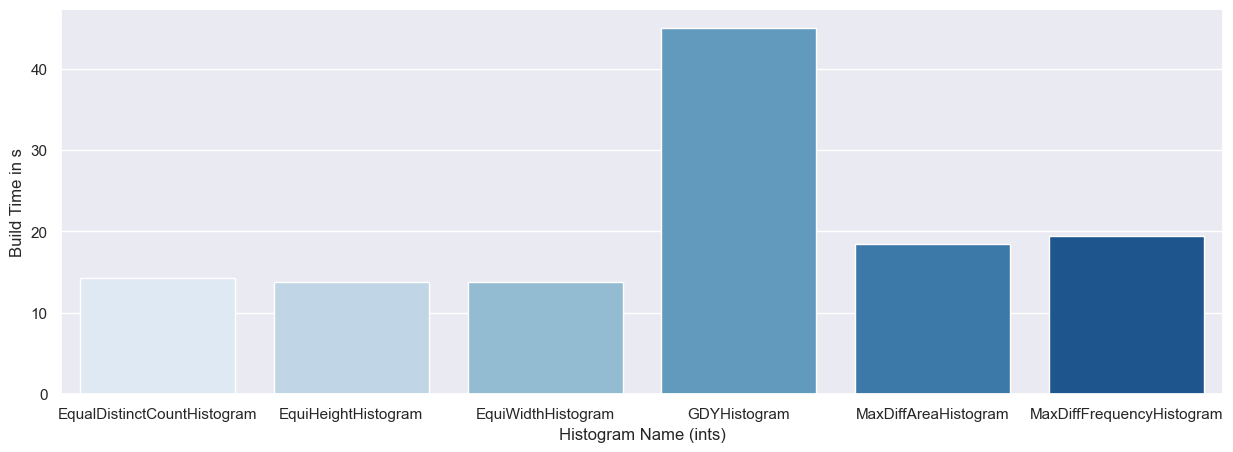

In [6]:
visualize_benchmark("job")

### TPCH Build Times

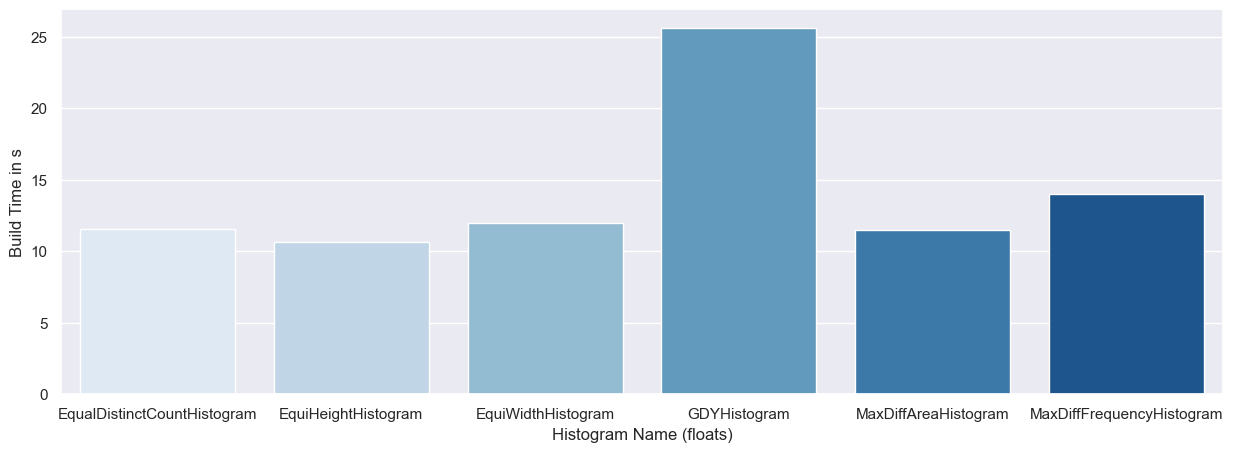

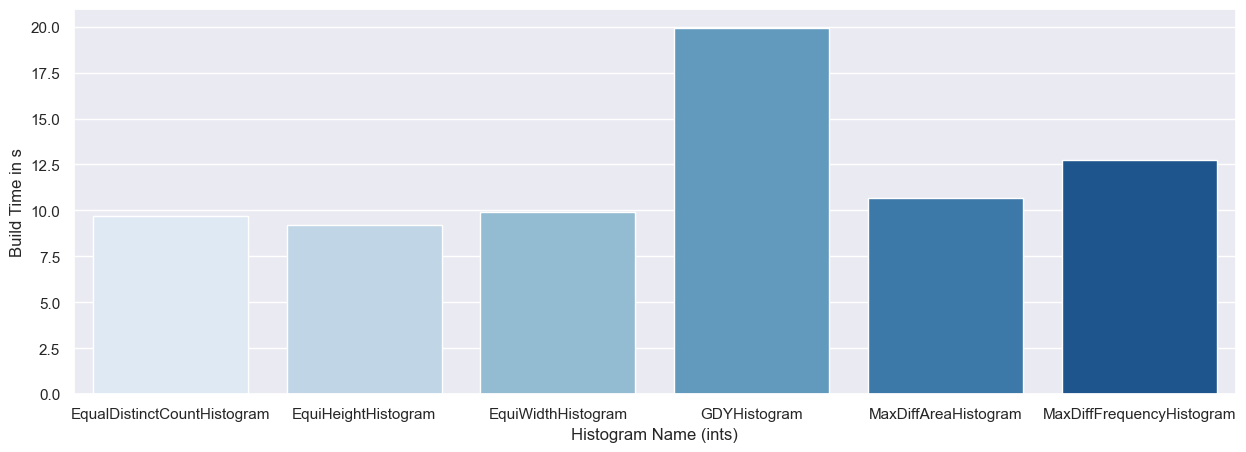

In [7]:
visualize_benchmark("tpch")

### TPCC Build Times

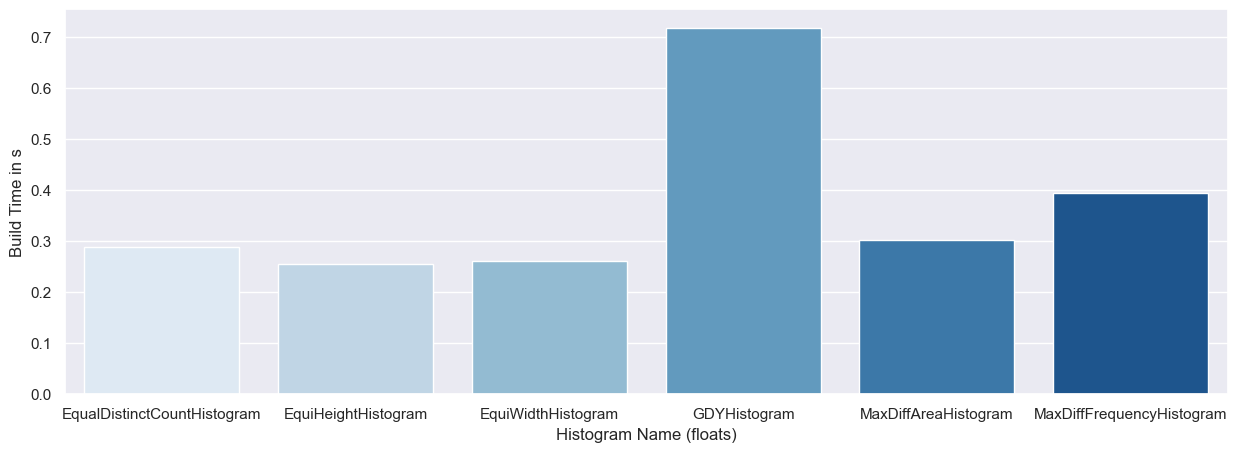

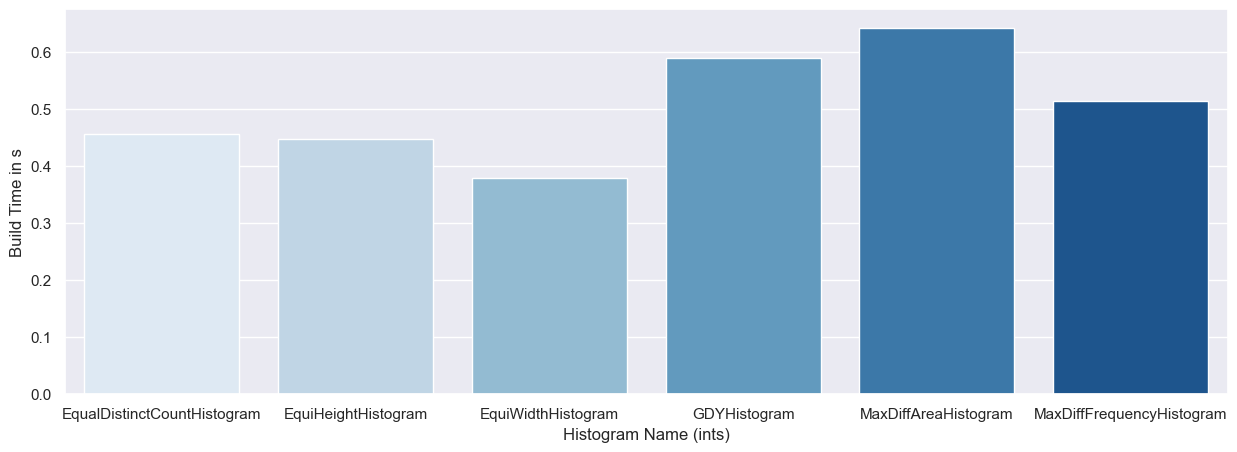

In [8]:
visualize_benchmark("tpcc")

### TPCDS Build Times

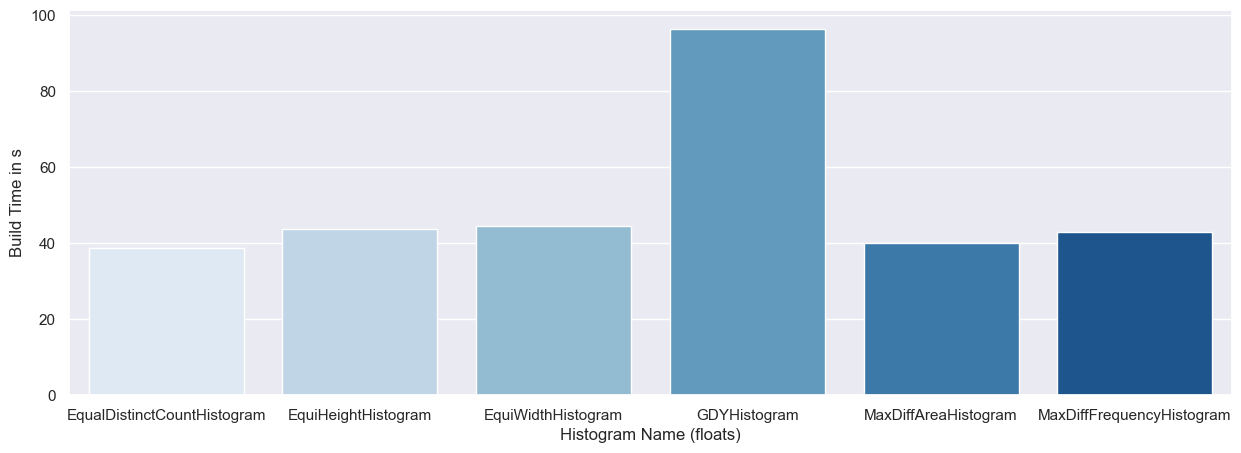

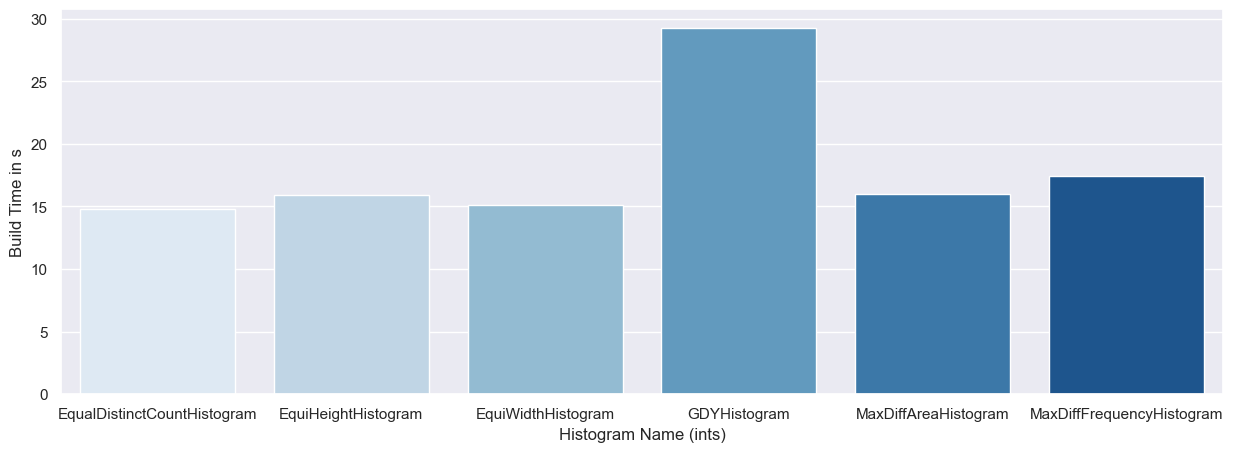

In [9]:
visualize_benchmark("tpcds")

## Multithreaded Build Times

In [12]:
multi_bts = pd.read_csv("final_data/build_times_multithreaded_2023-03-12-18:49:15.csv").drop(columns=["COLUMN_ID"]).query("COLUMN_DATA_TYPE != 'string'").groupby(["HISTOGRAM_NAME", "THREAD_COUNT"]).sum()

multi_bts

/var/folders/nd/cm157s6x1fxgl2wf5c5wdv000000gn/T/ipykernel_21993/3399502623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  multi_bts = pd.read_csv("final_data/build_times_multithreaded_2023-03-12-18:49:15.csv").drop(columns=["COLUMN_ID"]).query("COLUMN_DATA_TYPE != 'string'").groupby(["HISTOGRAM_NAME", "THREAD_COUNT"]).sum()


TOTAL_COUNT  BIN_COUNT  BUILD_TIME
HISTOGRAM_NAME       THREAD_COUNT                                     
MaxDiffAreaHistogram 1             1.689970e+09      18313  152.016194
                     2             1.700949e+09      18312  186.569763
                     3             1.700965e+09      18313  208.287006
                     4             1.700959e+09      18313  234.860056
                     6             1.700963e+09      18313  279.264518
                     8             1.700964e+09      18313  331.288108
                     12            1.700955e+09      18313  405.181522
                     16            1.700947e+09      18313  470.605655
                     20            1.700948e+09      18313  508.231410
                     24            1.700943e+09      18313  558.345732
                     28            1.700942e+09      18313  613.015688
                     32            1.700938e+09      18312  640.401830
                     36            1.700963e+09      18312  680.957458
                     40            1.700959e+09      18313  728.812039
                     44            1.700954e+09      18312  770.569434
                     48            1.700952e+09      18313  755.674740
                     52            1.700960e+09      18313  832.633771
                     56            1.700961e+09      18313  831.772568
                     60            1.700951e+09      18313  895.594650
                     64            1.700953e+09      18313  924.383218

/var/folders/nd/cm157s6x1fxgl2wf5c5wdv000000gn/T/ipykernel_21993/464682172.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x = 'THREAD_COUNT', y = 'BUILD_TIME', data = multi_bts.reset_index(),


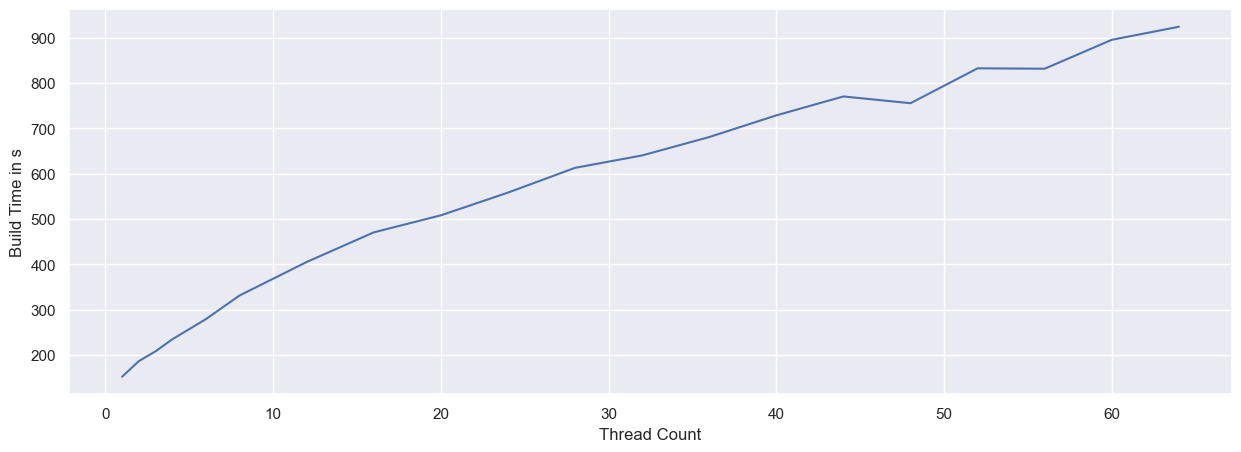

In [13]:
sns.set_context('paper')
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.lineplot(x = 'THREAD_COUNT', y = 'BUILD_TIME', data = multi_bts.reset_index(),
            palette = 'Blues')
ax.set(xlabel='Thread Count', ylabel='Build Time in s')
plt.show()

## TPCH Total Build Times

In [ ]:
tpch_bts = pd.read_csv("data/tpch_total_build_times.csv").drop(columns=["QUERY_NO"]).groupby(["HISTOGRAM_NAME"]).sum()

In [ ]:
tpch_bts